In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#reading data
train=pd.read_csv("trainhr.csv")
test=pd.read_csv("testhr.csv")

In [4]:
#getting shape of data sets
print("Shape of train: ",train.shape)
print("Shape of train: ",test.shape)

Shape of train:  (54808, 14)
Shape of train:  (23490, 13)


In [5]:
#getting head of train
print(train.head())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1 

In [6]:
#getting head of test
print(test.head())

   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

In [7]:
#describing training dataset
train.describe()
#train.describe(include='all')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
#getting info of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
#checking if there is any NULL value in the train dataset
train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [10]:
#checking if there is any NULL value in the test dataset
test.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

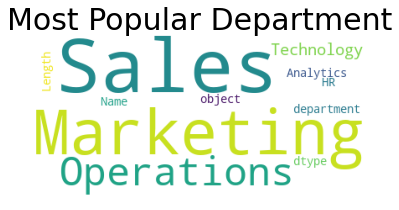

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#looking at the most popular department

stopword=set(STOPWORDS)
wordcloud=WordCloud(background_color="white",stopwords=stopword).generate(str(train["department"]))
plt.rcParams["figure.figsize"]=(12,8)
print(wordcloud)
plt.title("Most Popular Department",fontsize=30)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
# checking no. of promoted employees 
promoted_emp =train["is_promoted"].value_counts()
print(promoted_emp)

0    50140
1     4668
Name: is_promoted, dtype: int64


In [13]:
#finding the % of emplyee promoted
promoted=(4668/54808)*100
print("percentage of employee promoted is {:.2f}%".format(promoted))

percentage of employee promoted is 8.52%


(array([50140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4668.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

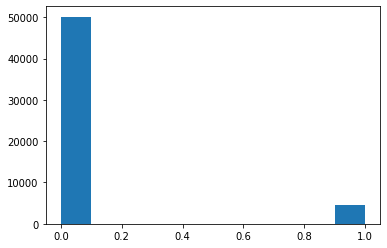

In [14]:
#plotting a scatter plot
plt.hist(train['is_promoted'])

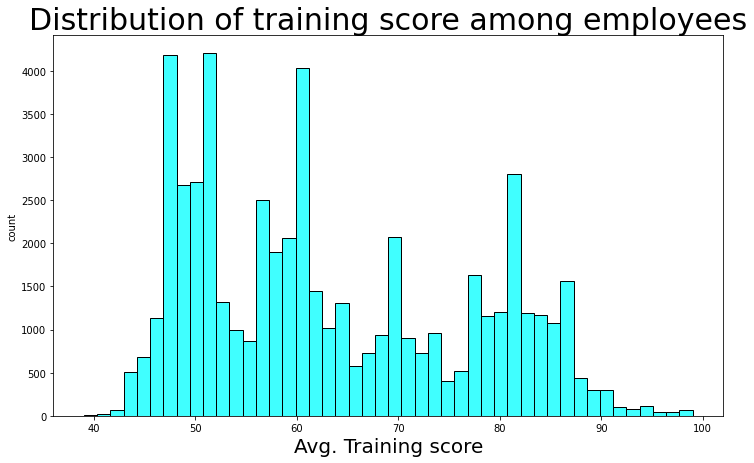

In [15]:
#checking the distribution of the avg. training score of the Employee
plt.rcParams['figure.figsize']=(12,7)
sns.histplot(train['avg_training_score'],color='cyan')
plt.title("Distribution of training score among employees",fontsize=30)
plt.xlabel("Avg. Training score",fontsize=20)
plt.ylabel("count")
plt.show()

In [16]:
#count no of employee won awards
train['awards_won?'].value_counts()


0    53538
1     1270
Name: awards_won?, dtype: int64

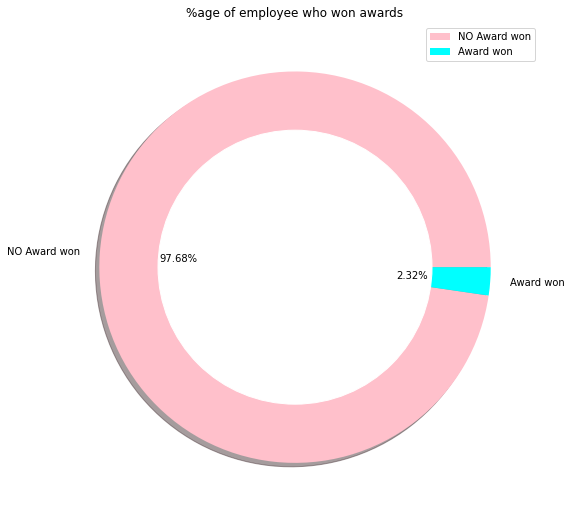

In [17]:
#plotting  pie chart
size=[53538,1270]
colors=['pink','cyan']
labels=["NO Award won","Award won"]
my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(9,9)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct="%.2f%%")
plt.title("%age of employee who won awards")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

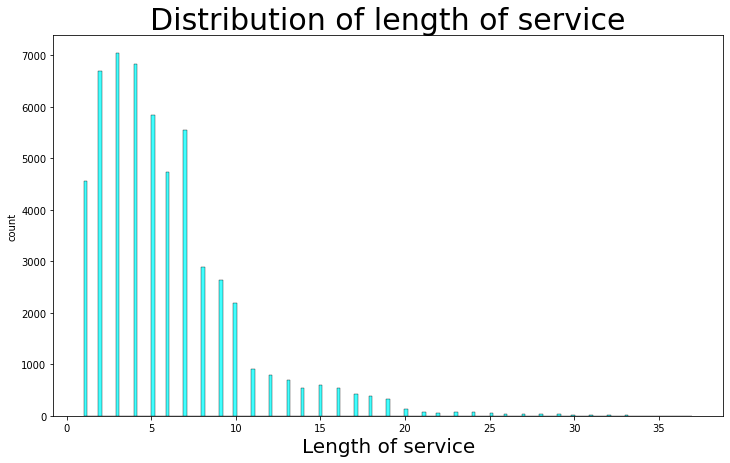

In [18]:
#checking the distribution of length of service
plt.rcParams['figure.figsize']=(12,7)
sns.histplot(train['length_of_service'],color='cyan')
plt.title("Distribution of length of service",fontsize=30)
plt.xlabel("Length of service",fontsize=20)
plt.ylabel("count")
plt.show()

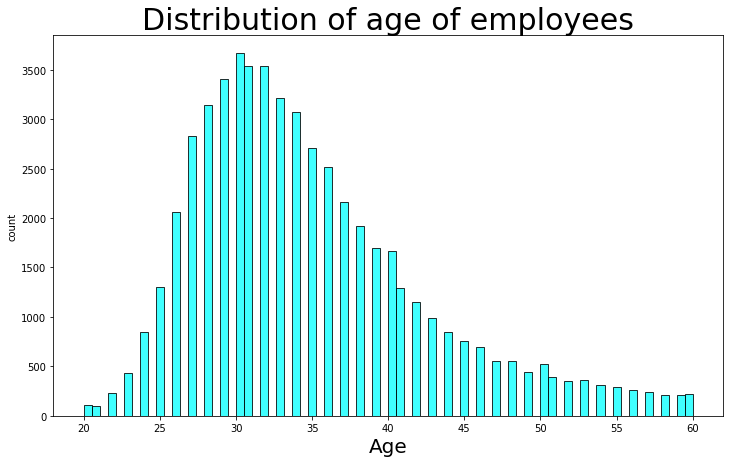

In [19]:
#checking the distribution of age of Employees in the company
plt.rcParams['figure.figsize']=(12,7)
sns.histplot(train['age'],color='cyan')
plt.title("Distribution of age of employees",fontsize=30)
plt.xlabel("Age",fontsize=20)
plt.ylabel("count")
plt.show()

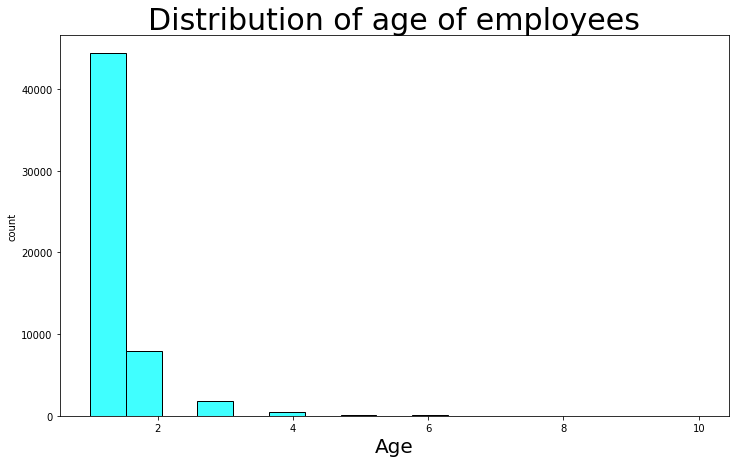

In [20]:
#checking the different no. of training done by the employees
#checking the distribution of age of Employees in the company
plt.rcParams['figure.figsize']=(12,7)
sns.histplot(train['no_of_trainings'],color='cyan')
plt.title("Distribution of age of employees",fontsize=30)
plt.xlabel("Age",fontsize=20)
plt.ylabel("count")
plt.show()

In [21]:
#checking the different types of recruitment channels for the company
train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

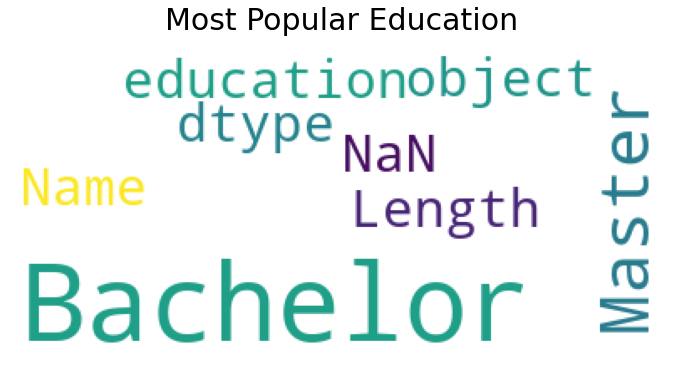

In [22]:
#checking the most popular education degree among the employees
stopword=set(STOPWORDS)
wordcloud=WordCloud(background_color="white",stopwords=stopword).generate(str(train["education"]))
plt.rcParams["figure.figsize"]=(12,8)
print(wordcloud)
plt.title("Most Popular Education",fontsize=30)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
#checking the gender gap
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [33]:
#checking the different regions of the company
train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

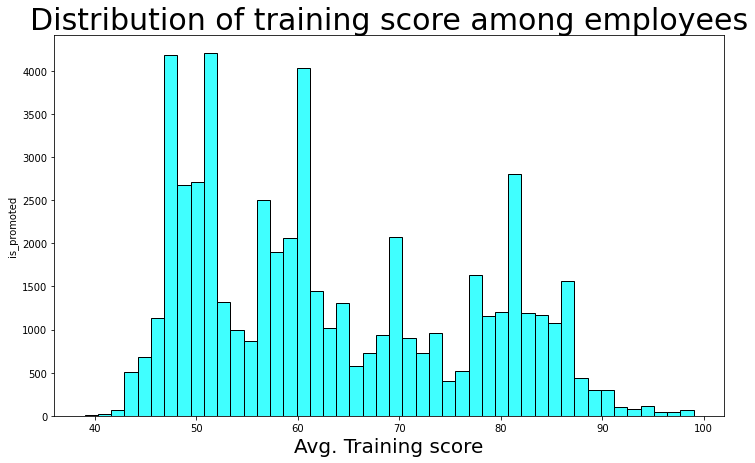

In [25]:
#scatter plot between average training score and is_promoted
plt.rcParams['figure.figsize']=(12,7)
sns.histplot(train['avg_training_score'],color='cyan')
plt.title("Distribution of training score among employees",fontsize=30)
plt.xlabel("Avg. Training score",fontsize=20)
plt.ylabel("is_promoted")
plt.show()

In [41]:
#checking dependency of different regions in promotion

regions=train['region'].unique()
#promotion=train["is_promoted"]


0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64


In [27]:
#checking dependency of awards won on promotion


In [28]:
#checking dependency of age factor in promotion of employees

In [29]:
#checking which department got the greatest number of promotions

In [30]:
#checking dependency of gender over promotion